In [91]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
# Imports
from backtest_utils import TradingSimulator
import pickle

In [93]:
strategy_name = 'dumb_strategy'
TS = TradingSimulator(strategy_name)

NOTICE: self.strategy: Need to use strategy_vault to automatically load the strategy based on strategy name (need to basically do a dynamic import


In [94]:
# Dump New symbols into the stock_symbols.pkl
stock_symbols_pickle = 'stock_symbols.pkl'  # Name of the pickle file
symbols = []  # Example list of stock symbols
if len(symbols) > 0:
    TS.SAU.add_stock_symbols_to_pickle(symbols, stock_symbols_pickle)

In [95]:
# Load the data from 'stock_symbols.pkl' into a variable called 'symbols'
with open(stock_symbols_pickle, 'rb') as file:
    symbols = pickle.load(file)

In [96]:
stock_symbols_pickle = 'stock_symbols.pkl'  # Name of the pickle file
TS.SAU.update_stock_data(pickle_file=stock_symbols_pickle)

Updating data for LIFW...


[*********************100%%**********************]  1 of 1 completed

Data for LIFW updated in data\LIFW.csv.
Updating data for SRL...


[*********************100%%**********************]  1 of 1 completed


KeyboardInterrupt: 

In [97]:
# Imports
from datetime import datetime

# Optional Imports
import numpy as np
import matplotlib.pyplot as plt

In [98]:
symbols = ['HDB', 'BIIB', 'BNTX', 'MRNA', 'CHTR', 'AWK', 'SNAP', 'TFC', 'ES', 'KDP', 'HSY', 'NEE', 'TTWO', 'EL', 'JD', 'BA', 'EQNR', 'HUM', 'NTR', 'WPM', 'WPM', 'WBA', 'SBAC', 'MMM', 'BTI', 'ILMN', 'WDS', 'ADM', 'PFE', 'ALNY', 'FNV', 'NEM', 'WBD']


In [99]:
from backtest_utils import TradingSimulator
start_date = '2018-01-01'
end_date = '2020-12-31'
start_date_dt = datetime.strptime(start_date, "%Y-%m-%d")
end_date_dt = datetime.strptime(end_date, "%Y-%m-%d")
rebalance_frequency = 15  # In days
# create a numpy array of numbers 15 days apart from 0 to 365
long_count = 10
short_count = 5
portfolio_starting_value = 110000
risk_pct = 0.1
reinvest_profits_bool = False

# Run the backtest
TS_no_leverage = TradingSimulator(strategy_name)
test_no_leverage = TS_no_leverage.run_backtest(symbols, start_date_dt, end_date_dt, rebalance_frequency, long_count, short_count, portfolio_starting_value, risk_pct, reinvest_profits_bool, leverage_multiplier=1.0, save_test=True)
TS_leverage = TradingSimulator(strategy_name)
test_w_leverage = TS_leverage.run_backtest(symbols, start_date_dt, end_date_dt, rebalance_frequency, long_count, short_count, portfolio_starting_value, risk_pct, reinvest_profits_bool, leverage_multiplier=5.0, save_test=True)



NOTICE: self.strategy: Need to use strategy_vault to automatically load the strategy based on strategy name (need to basically do a dynamic import


Running backtest: 2020-12-16 - 2020-12-30: 100%|██████████████████████| 73/73 [00:02<00:00, 29.51it/s, Profit=-2422.11]


Backtest results saved to backtests/Test_59.pkl
NOTICE: self.strategy: Need to use strategy_vault to automatically load the strategy based on strategy name (need to basically do a dynamic import


Running backtest: 2018-05-31 - 2018-06-14:  14%|███                   | 10/73 [00:00<00:02, 28.59it/s, Profit=-2.23e+4]

Backtest results saved to backtests/Test_60.pkl


In [100]:
from analysis_utils import BacktestAnalyzer, compare_two_backtests

In [101]:
no_leverage_analyzer = BacktestAnalyzer(test_no_leverage)
leveraged_analyzer = BacktestAnalyzer(test_w_leverage)

total_comparison, long_comparison, short_comparison, no_leverage_analysis, leveraged_analysis = (
    compare_two_backtests(no_leverage_analyzer, leveraged_analyzer)
)

from IPython.display import display, HTML
import pandas as pd

pd.options.display.float_format = '{:,.4f}'.format

display(total_comparison)
display(long_comparison)
display(short_comparison)

backtests/Test_1_analysis.pkl
Backtest analysis saved to backtests/Test_1_analysis.pkl
backtests/Test_2_analysis.pkl
Backtest analysis saved to backtests/Test_2_analysis.pkl


lst                                           total                        
test                        leverage_multiplier=1.0 leverage_multiplier=5.0
cagr                                        -0.2818                 -2.4460
max_drawdown                                 0.8183                  0.8097
pct_periods_up                               0.3425                  0.1818
pct_periods_down                             0.6575                  0.8182
pct_up_bets                                  0.4393                  0.3758
pct_down_bets                                0.5562                  0.6242
median_gain_to_average_loss                 -0.5135                 -0.7175
profit_factor                               -1.0191                 -1.2415
sharpe_ratio                                -2.2252                 -4.6314
beta                                         0.2785                 -0.7221
sortino_ratio                               -3.3754                 -4.9489
test_score                                   0.4162                  0.1200

lst                                            long                        
test                        leverage_multiplier=1.0 leverage_multiplier=5.0
cagr                                        -0.1205                 -1.6645
max_drawdown                                 0.3606                  0.5403
pct_periods_up                               0.4110                  0.2727
pct_periods_down                             0.5890                  0.7273
pct_up_bets                                  0.5082                  0.3727
pct_down_bets                                0.4877                  0.6273
median_gain_to_average_loss                 -0.8627                 -0.1131
profit_factor                               -0.9890                 -1.2659
sharpe_ratio                                -0.8775                 -3.7162
beta                                         0.3683                  0.1887
sortino_ratio                               -1.4062                 -3.9096
test_score                                   0.9567                  0.6619

lst                                           short                        
test                        leverage_multiplier=1.0 leverage_multiplier=5.0
cagr                                        -0.1613                 -0.7815
max_drawdown                                 0.4731                  0.2797
pct_periods_up                               0.1370                  0.2727
pct_periods_down                             0.8630                  0.7273
pct_up_bets                                  0.3014                  0.3818
pct_down_bets                                0.6932                  0.6182
median_gain_to_average_loss                 -0.5101                 -0.2223
profit_factor                               -1.0090                 -1.1481
sharpe_ratio                                -4.7823                 -4.1841
beta                                        -0.0898                 -0.9108
sortino_ratio                               -7.4099                 -5.0119
test_score                                   0.4765                  0.1300

In [102]:
benchmark_profits = TS.get_benchmark_returns(start_date_dt, end_date_dt, test_no_leverage['rebalance_periods'], portfolio_starting_value, benchmark_name='^IXIC')

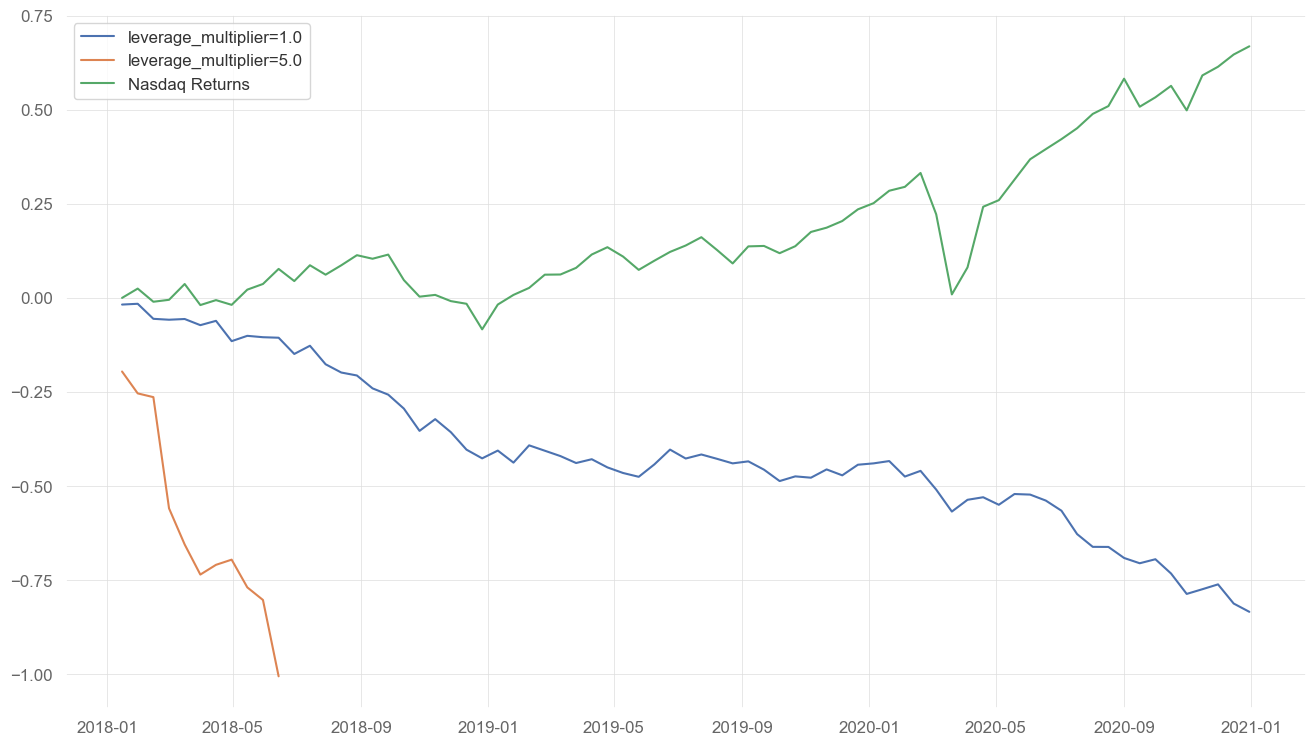

In [103]:
# Plot the backtest profits and the benchmark_data
test_no_leverage_returns = [x/test_no_leverage['inputs']['portfolio_starting_value'] for x in test_no_leverage['backtest_profits']]
test_w_leverage_returns =  [x/test_w_leverage['inputs']['portfolio_starting_value'] for x in test_w_leverage['backtest_profits']]

benchmark_returns = benchmark_profits/(
        test_no_leverage['inputs']['portfolio_starting_value'])

plt.figure(figsize=(16, 9))
plt.plot(np.array(test_no_leverage['rebalance_periods'])[:, 1], np.cumsum(test_no_leverage_returns), label=total_comparison.columns[0][1])
plt.plot(np.array(test_w_leverage['rebalance_periods'])[:, 1], np.cumsum(test_w_leverage_returns), label=total_comparison.columns[1][1])
plt.plot(np.array(test_no_leverage['rebalance_periods'])[:, 1], np.cumsum(benchmark_returns), label='Nasdaq Returns')

# Show labels
plt.legend()
# Show the plot
plt.show()

In [104]:
print(np.sum(test_no_leverage_returns))

-0.8339023235004605
